<a href="https://colab.research.google.com/github/dbalaji111/examples/blob/master/causal_chains_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install causal-chains -q
!pip install wikipedia -q
!pip install datasets -q

In [ ]:
from causal_chains.CausalChain import CausalChain, util
import wikipedia

In [ ]:
#@title Modeling Causal Relationships Within a Wikipedia Article
text = wikipedia.page("ChristopherColumbus").content
chunks = util.create_chunks(text)
cc = CausalChain(chunks,device=0)

Analyzing causation...


109it [00:16,  6.79it/s]


Linking events...


100%|██████████| 109/109 [00:01<00:00, 63.85it/s]


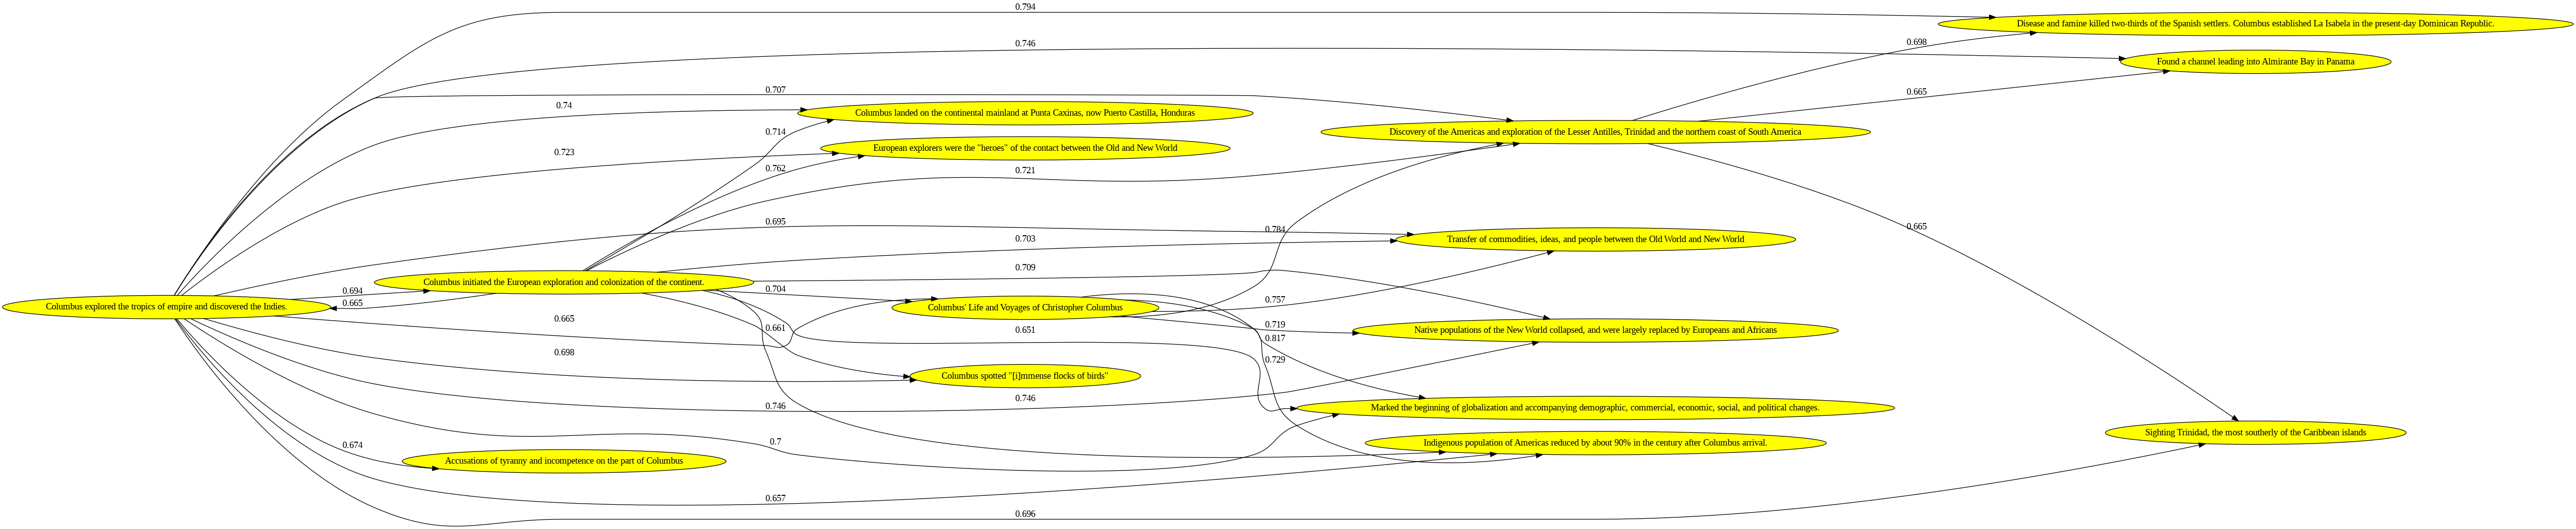

In [ ]:
#@title Choosing Threshold and Displaying Connections
cc.create_connections(chain_threshold=0.65)
biggest_chain = cc.biggest_chain
cc.visualize(biggest_chain)

In [ ]:
#@title Modeling Causal Relationships Between News Articles
from datasets import load_dataset

dataset_name = "cc_news"
dataset = load_dataset(dataset_name, split="train")
chunks = dataset["text"][:1000]
cc = CausalChain(chunks,device=0)

In [ ]:
cc.create_connections(chain_threshold=0.6, batch_size=32)
cc.connections

In [ ]:
chain = cc.find_chains("Trump's comments on the state of the U.S.", link_length=10)

In [ ]:
chain = chain[0]+[item[1] for item in chain]

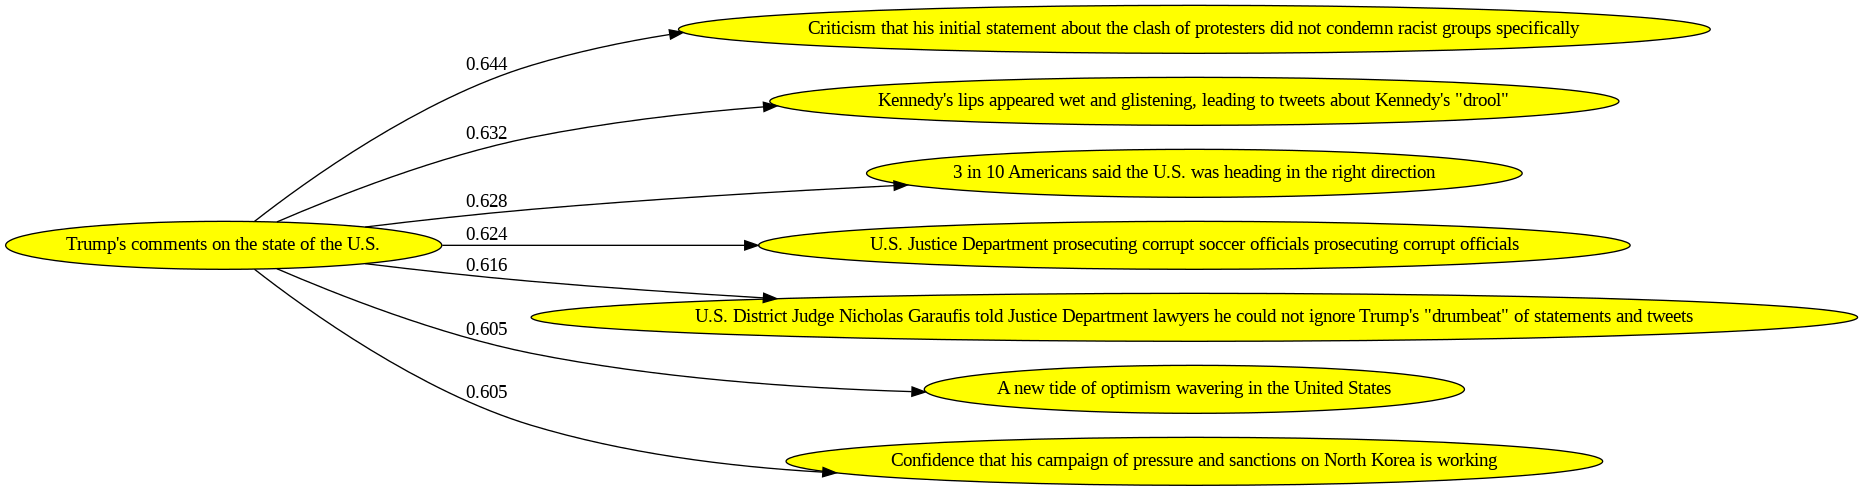

In [ ]:
#@title Choosing Threshold and Displaying Connections
cc.visualize(chain)